<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pencil Sketch

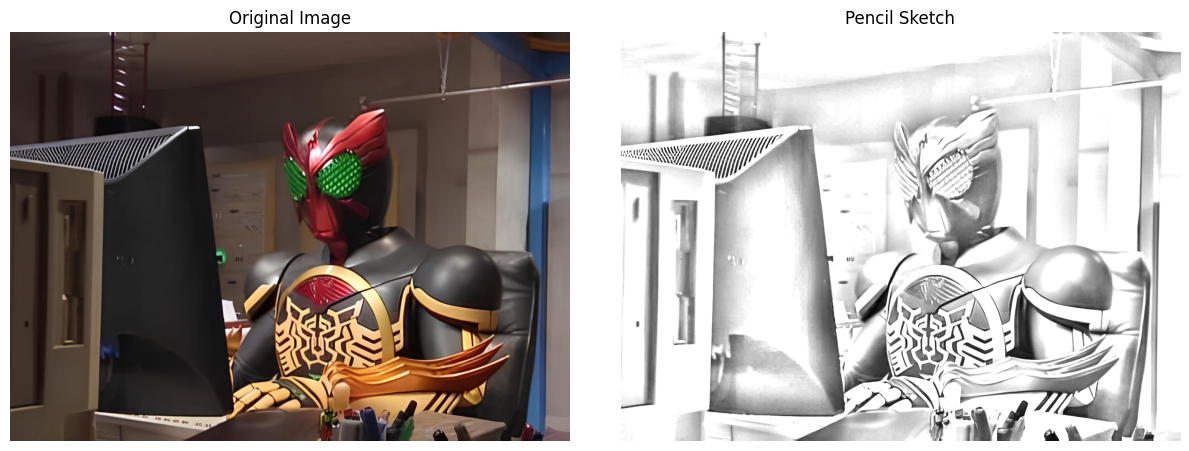

In [ ]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg"
image = cv2.imread(path)
gimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = 255 - gimg

blurred_image = cv2.GaussianBlur(invert, (255, 255), -1) # set odd value in the purple bracket , the higher the value the clearer the sketch

invertblur = 255 - blurred_image
pencil_sketch = cv2.divide(gimg, invertblur, scale=256.0)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pencil_sketch, cmap="gray")
plt.title("Pencil Sketch")
plt.tight_layout()
plt.axis("off")
plt.show()

**I was brainstorming ideas for my final project when I got inspired by my roommate, who loves to draw. He asked if it was possible to create a tool to help him make simple sketches. That sparked my first idea: to work on a project related to art. While researching online, I discovered that such a project was feasible, so I started exploring references and combining pieces of code step by step to achieve the desired result. Since most of the existing code didn’t produce the output I wanted, I had to make numerous adjustments. Eventually, I succeeded and added clear instructions in the code to make it user-friendly. The main reference for this project is** https://github.com/Snigdho8869/Image-Processing-Projects

# Cartoonize

(-0.5, 1351.5, 987.5, -0.5)

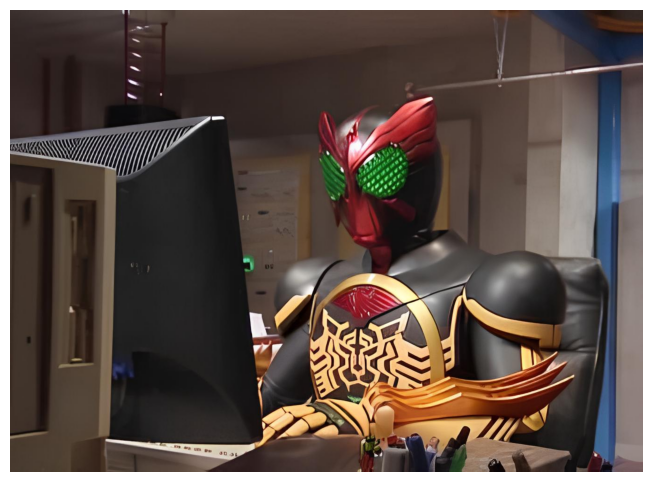

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,6)
img = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

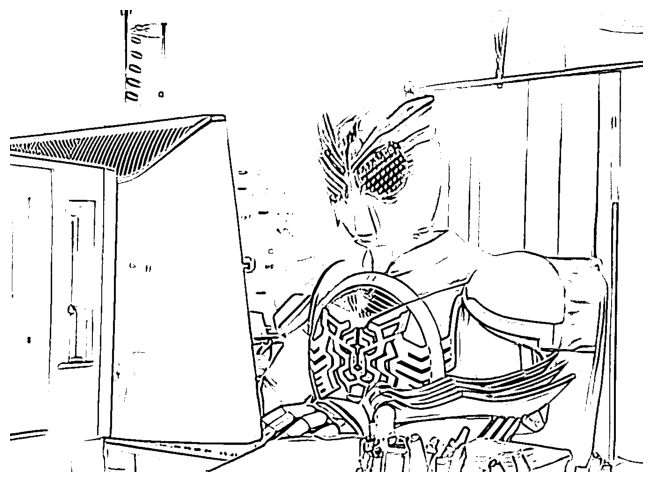

In [ ]:
linesize = 9
blur = 5 # range 5 to 9
gimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gblur = cv2.medianBlur(gimg, blur)
edges = cv2.adaptiveThreshold(gblur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, linesize, blur)
plt.imshow(edges, cmap="gray")
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

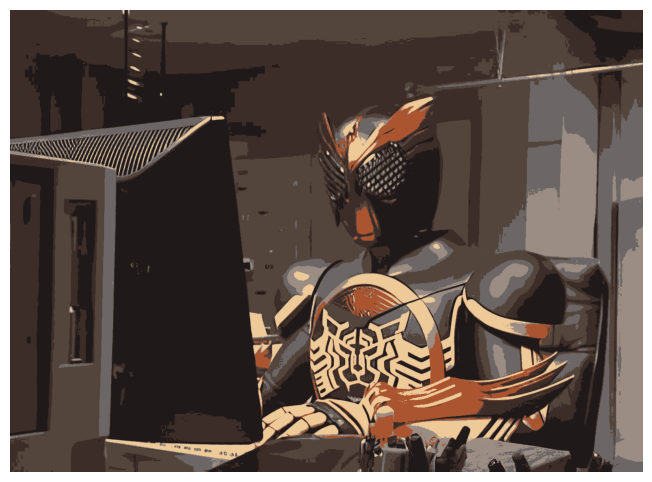

In [ ]:
from sklearn.cluster import KMeans
k = 7 # you can set this scaling as you like how will it be resulted
data = img.reshape(-1, 3)
kmeans = KMeans(n_clusters=k, random_state=1028).fit(data) # you can just get the random state to tezturize the image
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)
img_reduced = img_reduced.astype(np.uint8)
plt.imshow(img_reduced)
plt.axis("off")

(-0.5, 1351.5, 987.5, -0.5)

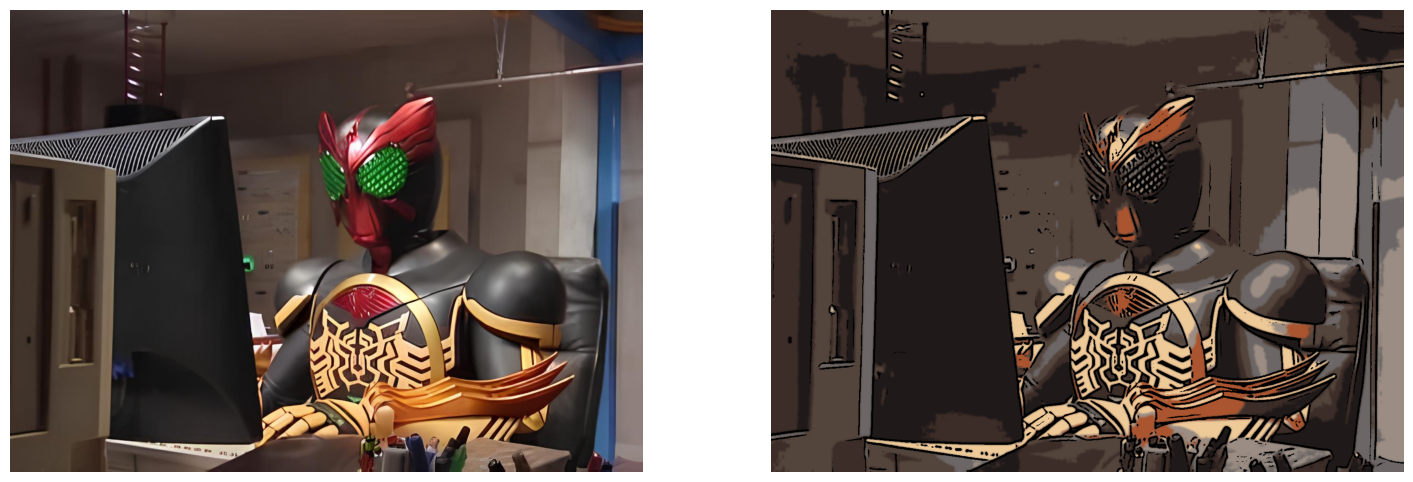

In [ ]:
blurred = cv2.bilateralFilter(img_reduced, d=6, sigmaColor=1028,sigmaSpace=1028)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cartoon)
plt.axis("off")

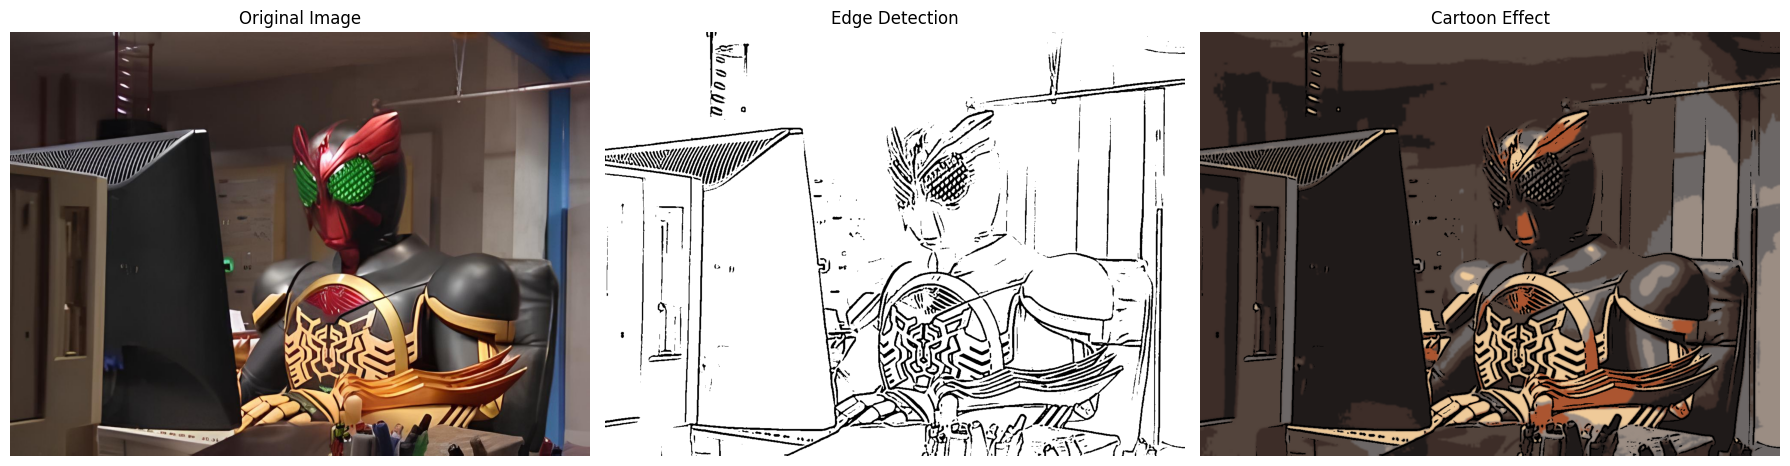

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 6)
img = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale and apply a median blur
line_size = 9
blur = 5
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur)

# Apply adaptive thresholding to get edges
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur)

# K Means clustering to reduce colors
k = 7
data = img.reshape(-1, 3)
kmeans = KMeans(n_clusters=k, random_state=1028).fit(data)
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)
img_reduced = img_reduced.astype(np.uint8)
blurred = cv2.bilateralFilter(img_reduced, d=6, sigmaColor=1028, sigmaSpace=1028)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cartoon)
plt.title("Cartoon Effect")
plt.axis("off")

plt.tight_layout()
plt.show()

 **After completing the pencil sketch program, I started wondering if it was possible to create a cartoon texture effect for images, mimicking the look of classic cartoon graphics. My goal was to make images appear more child-friendly. I discovered that it was achievable, but finding the right approach proved challenging. I explored numerous references, but many of them didn’t give the desired results, and some were too complex for me to fully understand.
Eventually, I found a GitHub reference that was simple and well-explained. By combining it with other reference codes, I managed to create a working solution. The output for this project varies depending on the settings, which I’ve annotated within the code cells. Achieving the best results depends on fine-tuning the values for each essential section. and this will be the reference code and i think it is mostly the same as what i done.** https://github.com/Abdesol/Cartoonify-Image


# Pixel Art

Enter the number of colors (default 10): 256
Enter the superpixel size (default 10): 8
Enter the saturation factor (default 1.25): 1.25
Enter the contrast factor (default 1.2): 1.2


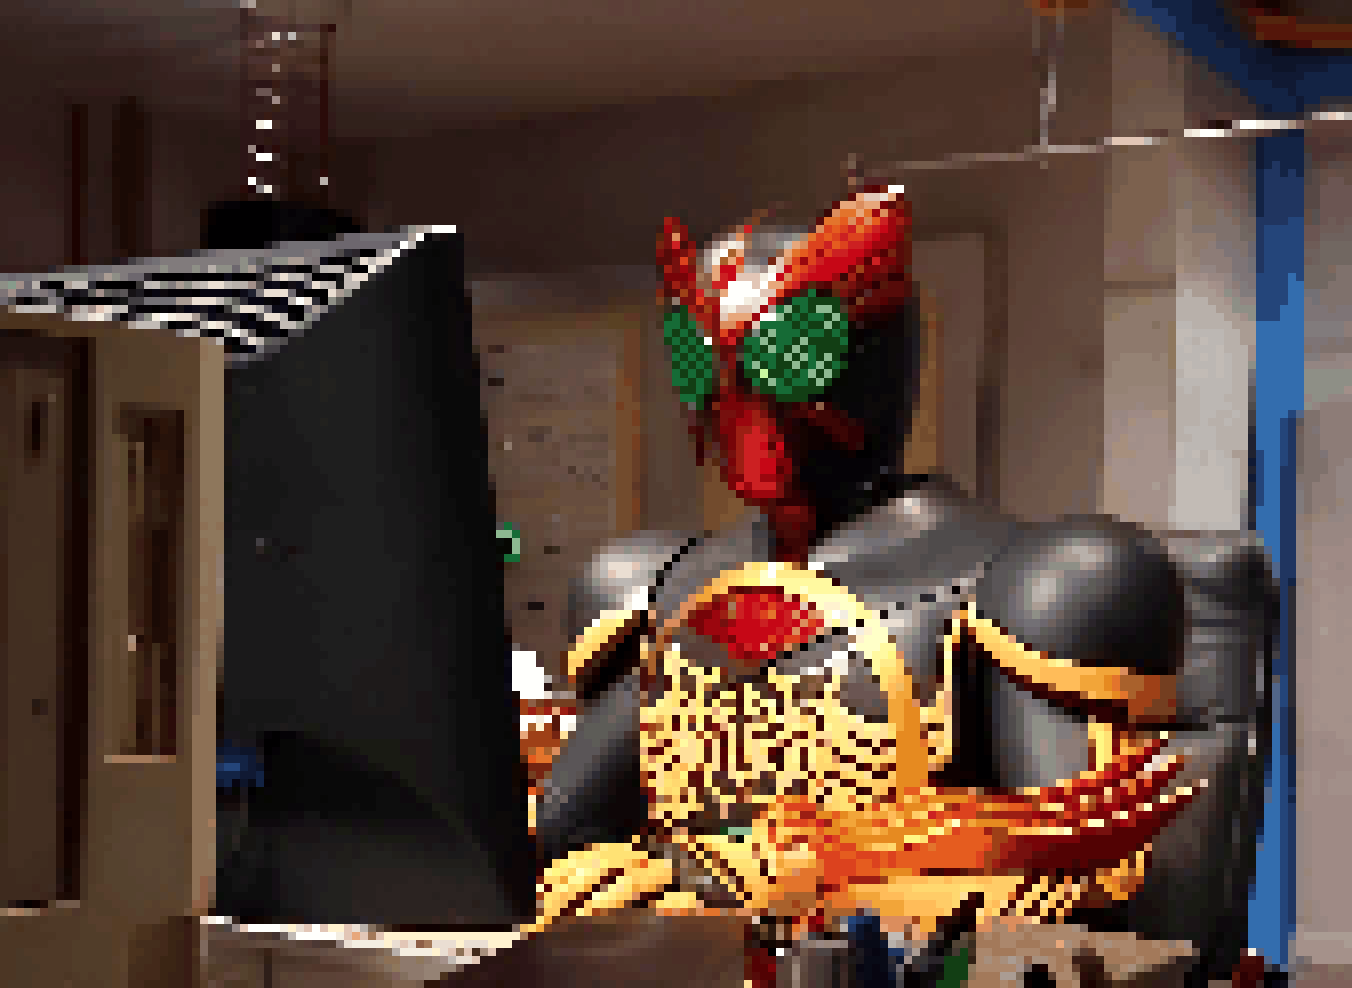

In [ ]:
import numpy as np
from PIL import Image, ImageEnhance
from IPython.display import display

def pixellize(path, colors=10, superpixel_size=10, saturation=1.25, contrast=1.2):
    """
    Pixellize an image with adjustable parameters.

    Parameters:
    - path (str): Path to the input image.
    - colors (int): Number of colors to use in the output image (default: 10).
    - superpixel_size (int): Size of superpixels (default: 10).
    - saturation (float): Saturation enhancement factor (default: 1.25).
    - contrast (float): Contrast enhancement factor (default: 1.2).
    """
    img = Image.open(path)
    img_size = img.size


    sat_booster = ImageEnhance.Color(img) # Boost saturation of image
    img = sat_booster.enhance(float(saturation))

    contr_booster = ImageEnhance.Contrast(img)# Increase contrast of image
    img = contr_booster.enhance(float(contrast))

    img = img.convert('P', palette=Image.ADAPTIVE, colors=int(colors))# Reduce the number of colors used in the picture

    reduced_size = (img_size[0] // superpixel_size, img_size[1] // superpixel_size) # Reduce image size
    img = img.resize(reduced_size, Image.BICUBIC)

    img = img.resize(img_size, Image.BICUBIC) # Resize to original shape to give a pixelated look
    display(img)

path = "/content/drive/MyDrive/python/IMAGE PROCESSING/1000003665.jpg"
colors = int(input("Enter the number of colors (default 10 ro 256): ") or 10)
superpixel_size = int(input("Enter the superpixel size (default 10): ") or 10)
saturation = float(input("Enter the saturation factor (default 1.25): ") or 1.25)
contrast = float(input("Enter the contrast factor (default 1.2): ") or 1.2)

pixellize(path, colors, superpixel_size, saturation, contrast)

**My final project was inspired by Minecraft's graphics, which are characterized by a pixelated aesthetic. I aimed to create a program that could replicate this effect for images. Initially, I experimented with image filtering techniques, but I wasn’t impressed with the results. Later, I discovered that there’s an actual project called “Image Pixelator.” At first, I thought it was just a name, as much of the code seemed similar to basic image filtering and cropping. However, I realized it was a lot more engaging and fun to work on.**

**Since the existing implementations felt too simple, I redesigned the code to allow customization of pixel color, pixel size, saturation, and contrast. This makes it possible to tweak the settings and experiment with the output to achieve the desired effect quickly and efficiently. It turned out to be a flexible and creative tool for testing various image styles.**

and this is the reference i based off https://github.com/chschommer/pixelate-images

Please let me pass this class ,i know i won't be doing good in the final exam 😰